# Setup

In [1]:
import numpy as np
import random

import os

from PIL import Image
from IPython.display import display

# Data

At first, all files from the image folder are extracted. Afterwards, a list with all directories is created.

In [2]:
path = '/home/emanuel/data_folder/images_folder/'
file_list = os.listdir(str(path))
print(len(file_list))

FileNotFoundError: [Errno 2] No such file or directory: '/home/emanuel/data_folder/images_folder/'

In [ ]:
path_list = []
for i in range(0, len(file_list)-1):
    temp = str(path + file_list[i])
    path_list.append(temp)

The following function plots one example image from the data set.

In [ ]:
def show_image(files=path_list, nr_imgs=9420):
    ind = random.randint(0, nr_imgs)
    file = files[ind]
    img = Image.open(file)
    display(img)

show_image()

The next function loads all the images and converts them to a numpy array.

In [ ]:
def load_data(files=path_list, nr_imgs=9420):
    rd_ind = random.sample(range(0,9419), nr_imgs)
    i = 0
    img_vec = []
    while i <= nr_imgs-1:
        temp = Image.open(files[rd_ind[i]])
        pix = np.array(temp)
        img_vec.append(pix)
        temp.close() 
        i += 1
    return img_vec

img_vec = load_data(nr_imgs=4)
print(len(img_vec))

In [ ]:
np.save("data.npy", img_vec)

# Preprocessing

## Truncate Images

First, load the data from the numpy arrary.

In [9]:
df = np.load("data.npy")
print(len(df[0]))
print(len(df[0][0]))

1200
1920


Develop method to plot the image based on numpy data.

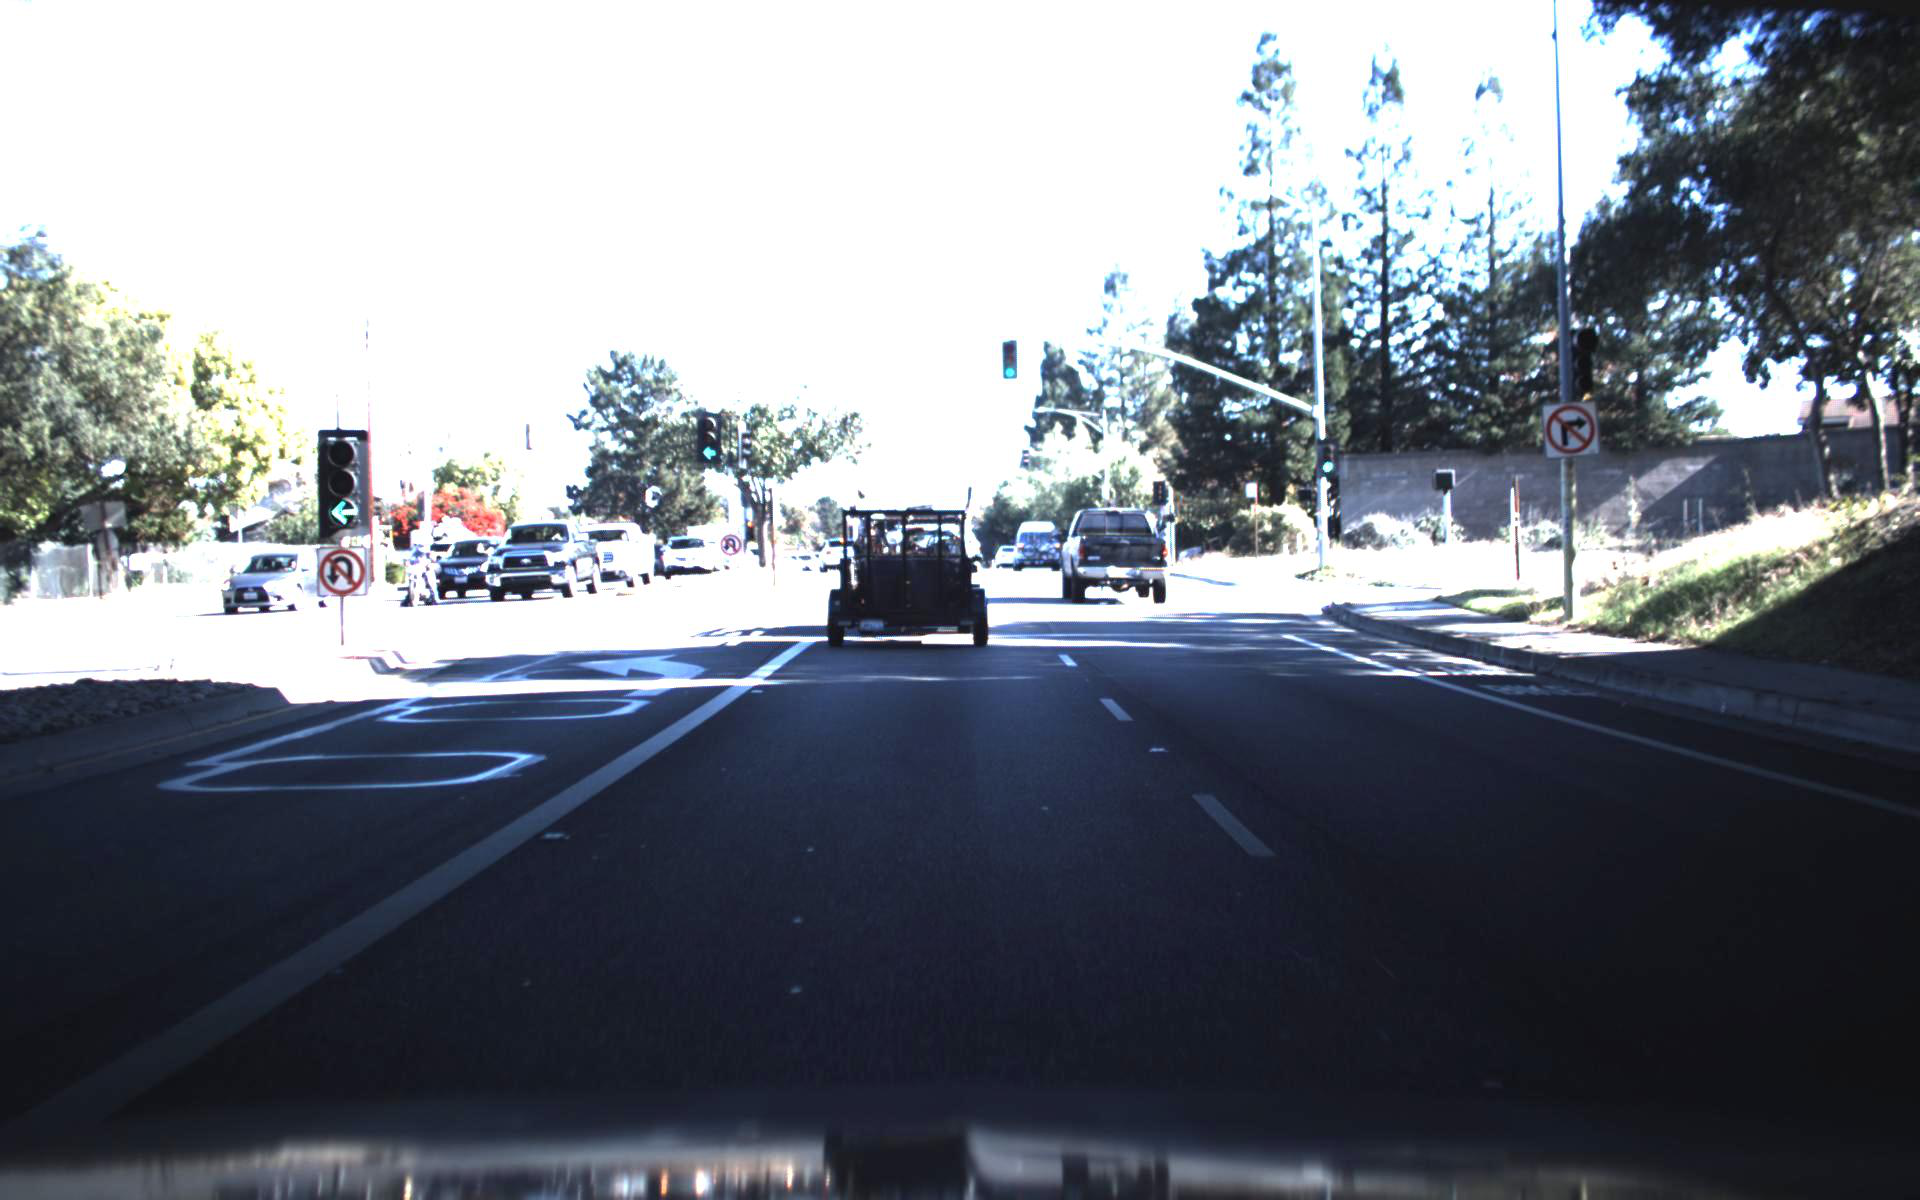

In [39]:
img = Image.fromarray(df[0], "RGB")
display(img)

The following function truncates the image (at first length, then width).

In [38]:
def resize(df, height, width):
    # create storage
    df_trunc_height = []
    df_trunc = []

    # truncate height
    for i in range(0, len(df)):
        curr_height = len(df[i])
        if height != curr_height:
            df_trunc_height.append(df[i][int((curr_height-height)/2):-int((curr_height-height)/2)])
        else:
            df_trunc_height.append(df[i])
            
    # truncate width
    for i in range(0, len(df_trunc_height)):
        # store image temporarily
        tmp_img = []
        for n in range(0, len(df_trunc_height[i])):
            curr_width = len(df[i][n])
            if curr_width != width:
                tmp_img.append(df_trunc_height[i][n][int((curr_width-width)/2):-int((curr_width-width)/2)])
            else:
                tmp_img.append(df_trunc_height[i][n])
        # append truncated image to list
        df_trunc.append(tmp_img)
    
    # reshape output to array           
    return np.asarray(df_trunc)

df_trunc = resize(df, 1000, 1000)
print(df_trunc.shape)

(4, 1000, 1000, 3)


Reuse the procedure to plot the same image as above.

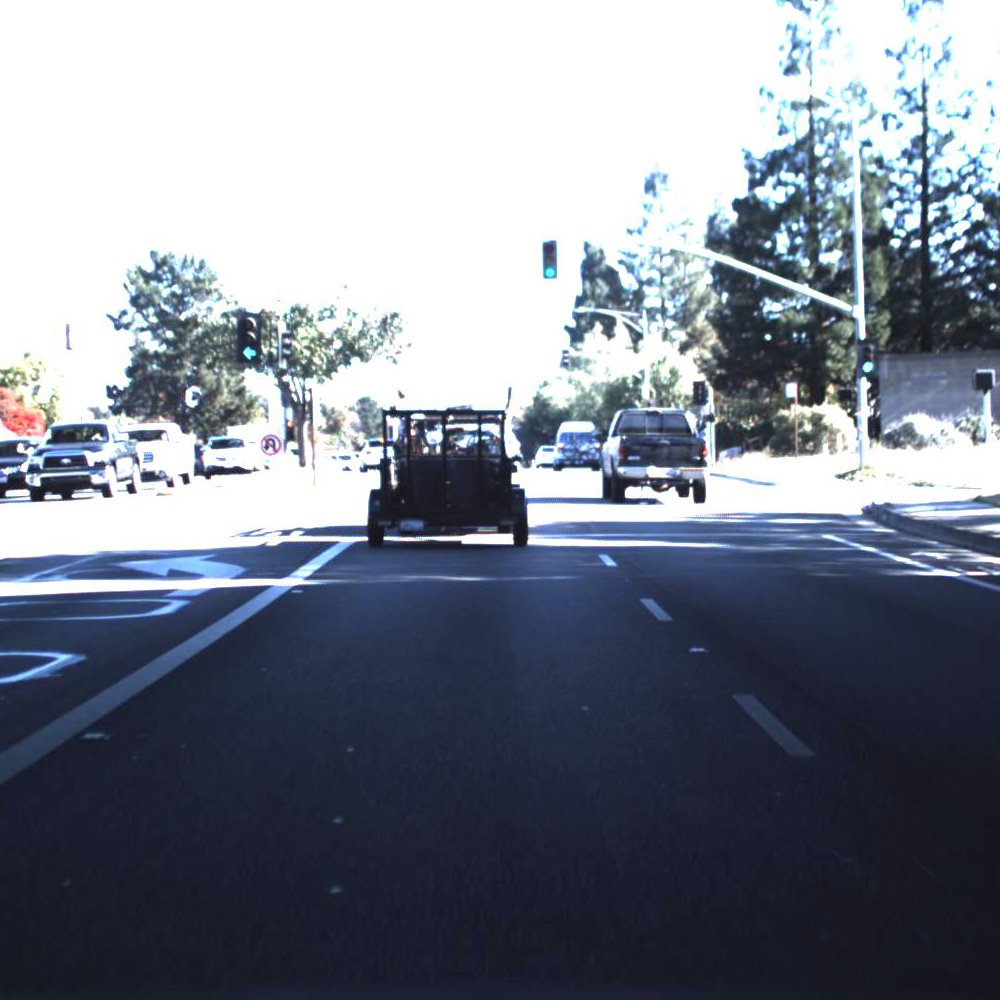

In [40]:
img = Image.fromarray(df_trunc[0], "RGB")
display(img)